<h1><center>
    ECE 438 - Laboratory 7a<br/>
    Discrete-Time Random Process (Week 1)<br/>
    <small>Last updated on March 1, 2022</small><br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of random variables and linear transformations (35 pts)**: *Plots, sample means and variances of $X$ and $Y$, derivation of mean and variance of $Y$, transformation and pdf of $Y$, Python code, questions*||||
|**Understanding of CDF estimation (20 pts)**: *Python code and plots*||||
|**Understanding of generating samples from a given distribution (20 pts)**: *Derivation of transformation, Python code, plots*||||
|**Understanding of PDF estimation (25 pts)**: *Plots, questions*||||

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. Use the Python function [`np.random.normal(loc=0, scale=1, size=1000)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate $1000$ samples of $X$, denoted as $X_1,X_2,\dots,X_{1000}$. We will assume our generated samples are *i.i.d.*.**

**Note:** `loc` is the mean (“centre”) of the distribution, while `scale` is the **standard deviation** (spread or “width”) of the distribution.

In [11]:
# insert your code here
gass = np.random.normal(loc=0, scale=1, size=1000)



**2. Plot them using the function ```plt.plot()```.**

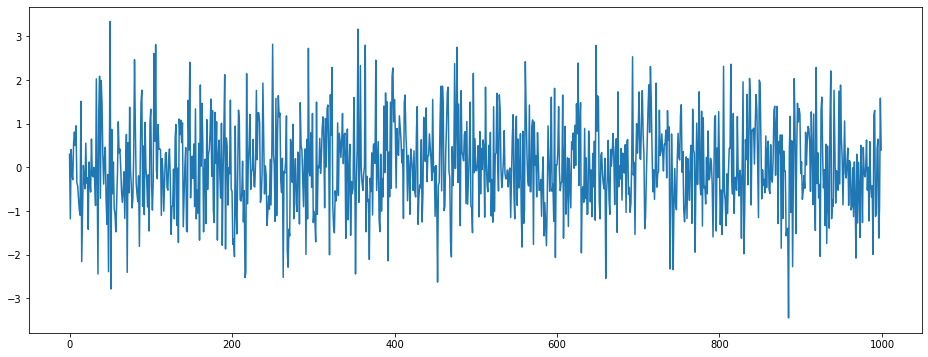

In [12]:
# insert your code here
plt.plot(gass)


**3. Write Python functions to compute the sample mean and sample variance of equations (6) and (7) without using the predefined `mean()`, `variance()`, `np.mean()` and `np.var()` functions.**

In [7]:
def get_sample_mean(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns
    ---
    mean_X: the sample mean of the random variable
    """

    N = len(X)
    mean_X = (1/N) * np.sum(X)

    return mean_X

In [8]:
def get_sample_var(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns:
    ---
    var_X: the sample variance of the random variable
    """
    N = len(X)
    var_X = 1/(N-1) * np.sum((X - get_sample_mean(X)) ** 2)
    return var_X

**4. Use these functions to compute the sample mean and sample variance of the samples you just generated.**

**Hint:** the following functions may be useful: ```np.sum()```and ```np.square```

In [13]:
# insert your code here
gass_mean = get_sample_mean(gass)
gass_var = get_sample_var(gass)

print(gass_mean)
print(gass_var)

0.020523110541689014
1.0622721809888094


<h3 style="color:red;"><left>Exercise 2.2</left></h3>

**1. Using the linearity property of expectation, find the mean $\mu_Y$ and variance $\sigma_Y^2$ of $Y$ in terms of $a,b,\mu_X$ and $\sigma_X^2$. Show your derivation in detail.**

**Hint:** First find the mean, then substitute the result when finding the variance.

**2. Consider a linear transformation of a Gaussian random variable $X$ with mean $0$ and variance $1$. Calculate the constants $a$ and $b$ which make the mean and the variance of $Y$ $3$ and $9$, respectively.**

insert your answer here

**3. Use equation (5) to find the probability density function (PDF) for $Y$.**

**4. Generate $1000$ samples of $X$, and then calculate $1000$ samples of $Y$ by applying the linear transformation in equation (10), using the $a$ and $b$ that you just determined.**

In [143]:
# insert your code here
a = 3
b = 3

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 3*X + 3

**5. Plot the resulting samples of $Y$.**

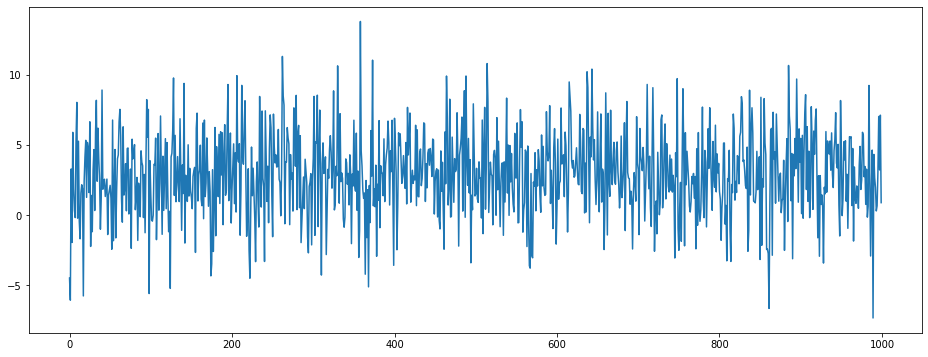

In [144]:
# insert your code here
plt.plot(Y)

**6. Use your functions to calculate the sample mean and sample variance of the samples of $Y$.**

In [146]:
# insert your code here
Ymean = get_sample_mean(Y)
Yvar = get_sample_var(Y)

print(Ymean)
print(Yvar)


2.8791554232274126
9.001285849158547


<h3 style="color:red;"><left>Exercise 3.1</left></h3>

**1. Write a function to compute the empirical CDF $\hat{F}_X(t)$ from the sample vector $X$ at the points specified in the vector $t$.**

**Hint:** The expression ```np.sum(X <= s)``` will return the number of elements in the vector ```X``` which are less than or equal to ```s```.**

In [70]:
def empcdf(X,t):
    """
    Parameter
    ---
    X: the samples of the random variable
    t: the samples of time
    
    Return
    ---
    F: the empirical CDF
    """
    N = len(X)
    F = np.zeros(len(t))
  
    for i, s in enumerate(t):
      F[i] = (1/N) * np.sum(X <= s)
                      
    return F

**2. For $N=20$ and $N=200$,**
  * **Generate a sample of $\text{Uniform}[0, 1]$ random variables using the function `X = np.random.uniform(0, 1, N)`.**
  * **Plot the CDF estimate in the range ```t = np.linspace(-1, 2, 2000)```, and superimpose the true distribution for a $\text{Uniform}[0, 1]$ random variable.**
  
**Note:** make sure the figures for $N=20$ and $N=200$ are plotted in separate cells.

In [79]:
def truecdf(t):
    F = np.zeros(len(t))

    for i in range(len(t)):
      if(t[i] <= 0):
        F[i] = 0
      elif(0 < t[i] < 1):
        F[i] = t[i]
      else:
        F[i] = 1

    return F

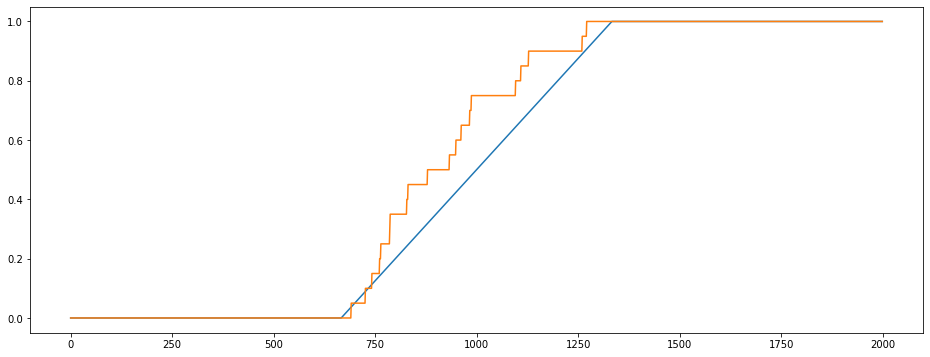

In [81]:
# N = 20
X = np.random.uniform(0, 1, 20)
t = np.linspace(-1,2,2000)

plt.plot(truecdf(t))
plt.plot(empcdf(X, t))

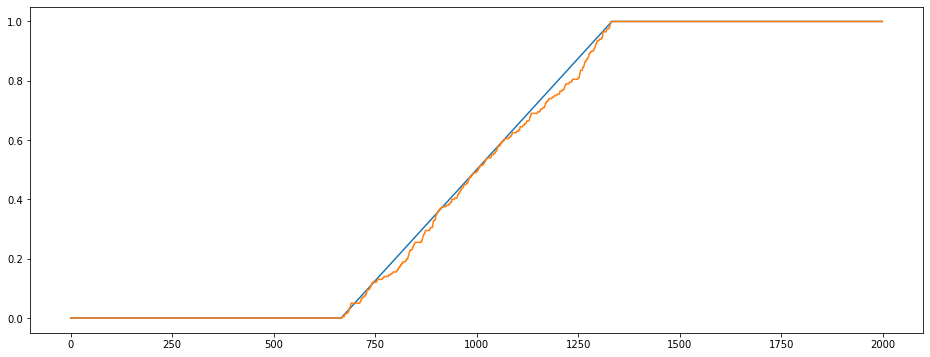

In [82]:
# N = 200
X = np.random.uniform(0, 1, 200)
t = np.linspace(-1,2,2000)

plt.plot(truecdf(t))
plt.plot(empcdf(X, t))

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Derive the required transformation.**

insert your answer here

**2. Generate samples of X when $N=20$ and $N=200$.**

In [97]:
# insert your code here
t = np.linspace(-1,2,2000)
true = (1 - np.exp(-3*t)) * (t >= 0).astype(float)

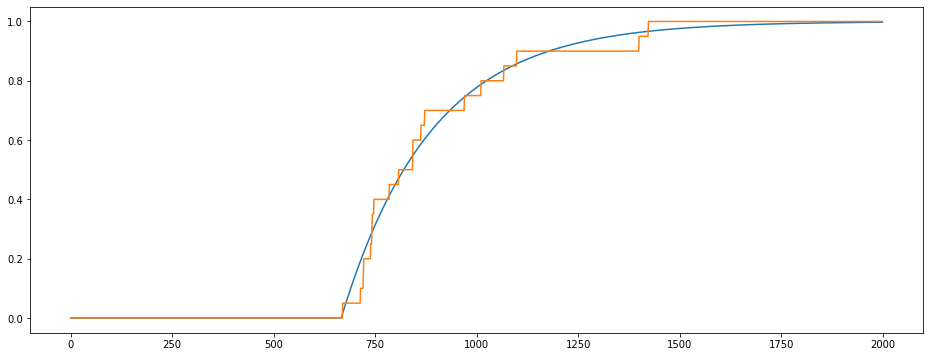

In [102]:
# N = 20
N = 20
t = np.linspace(-1,2,2000)

U = np.random.uniform(0,1,N)
X = np.log(1 - U) / -3

plt.plot(true)
plt.plot(empcdf(X,t))


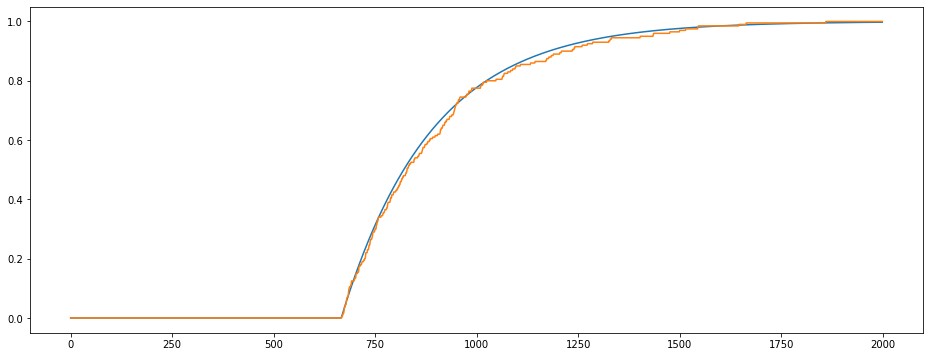

In [101]:
# N = 200
N = 200
t = np.linspace(-1,2,2000)

U = np.random.uniform(0,1,N)
X = np.log(1 - U) / -3

plt.plot(true)
plt.plot(empcdf(X,t))


<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Plot $F_X(x)$ for $x\in[0, 1]$.**

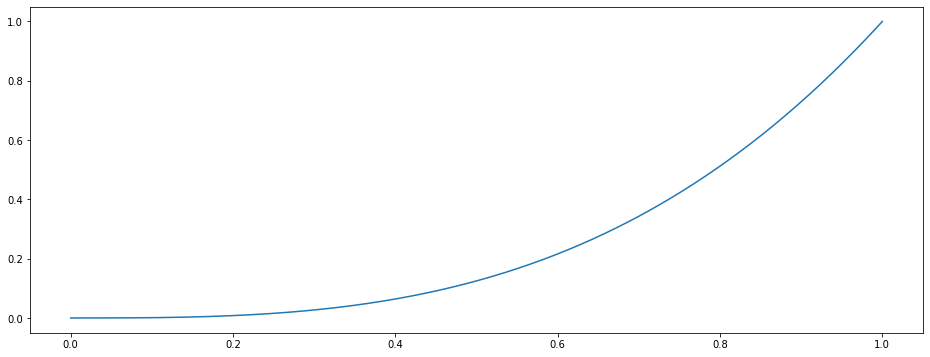

In [123]:
# insert your code he
x = np.linspace(0,1,1001)
FXx = x ** 3
plt.plot(x, FXx)


**2. Analytically calculate the probability density $f_X(x)$, and plot it for $x \in [0, 1]$.**

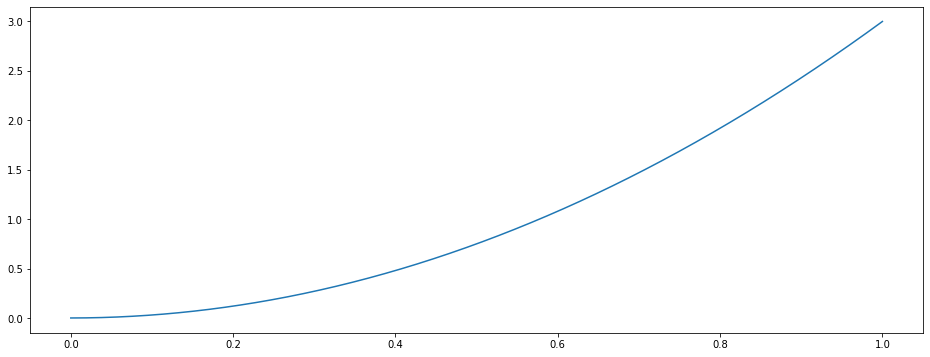

In [124]:
# insert your code here
x = np.linspace(0,1,1001)
fXx = 3 * x ** 2
plt.plot(x, fXx)


**3. Using $L = 20$, $x_0 = 0$ and $x_L = 1$, write code to compute $\tilde{f}(k)$, the probability of $X$ falling into *$bin(k)$*. Plot $\tilde{f}(k)$ for $k=1,\dots,L$ using the ```plt.stem()``` function.**

**Hint:** Use the fact that $\tilde{f}(k) = F_X(x_k) − F_X(x_{k−1})$.

<StemContainer object of 3 artists>

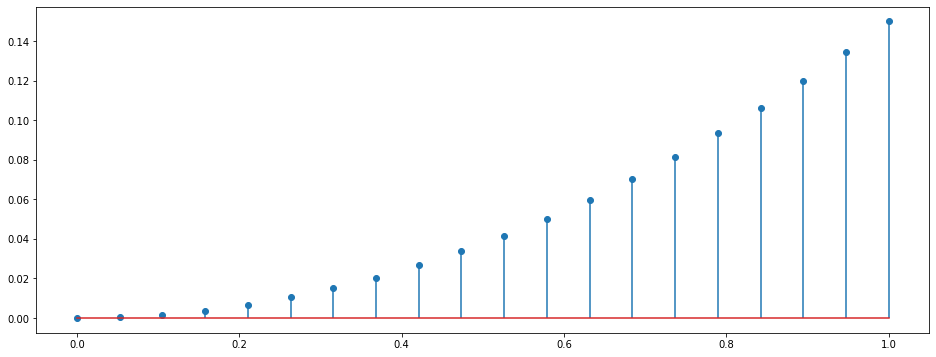

In [138]:
# insert your code here
xo = 0
xl = 1
L = 20
delta = (xl - xo) / (L)

binx = np.linspace(xo, xl, L)
fXx = 3 * binx ** 2
fk = fXx * delta

plt.stem(binx,fk)




**4. Show (mathematically) how $f_X(x)$ and $\tilde{f}(k)$ are related.**

insert your answer here

**5. Generate $1000$ samples of a random variable $U$ that is uniformly distributed between $0$ and 1 (using the ```np.random.uniform(0, 1, 1000)```). Then form the random vector $X$ by computing $X=U^{1/3}$.**

In [141]:
# insert your code here
U = np.random.uniform(0,1,1000)
X = U ** (1/3)

**6. Use the Python function [```np.histogram()```](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) to plot a *normalized* histogram for your samples of $X$, using $20$ bins uniformly spaced on the interval $[0, 1]$. Use the ```plt.stem()``` command to plot the normalized histogram $H(k)/N$.**

**Hint:** Use the Python command ```H, _ = np.histogram(X, bins=20, range=(0, 1))``` to obtain the normalized histogram. The underscore `_` means that whatever the second argument the function returns, I don't care and don't bother assigning it to a variable.

<StemContainer object of 3 artists>

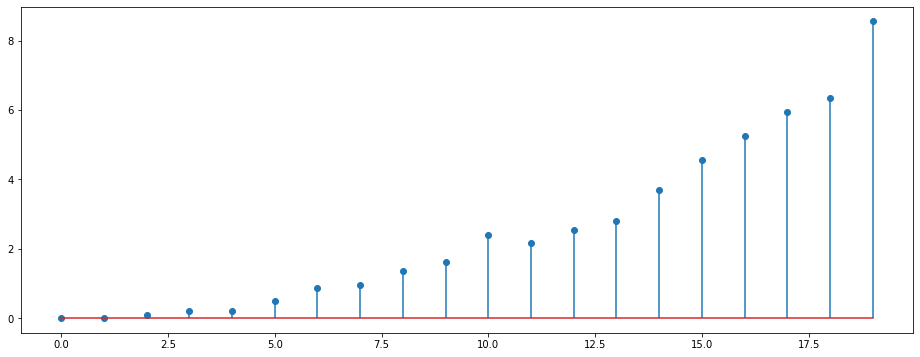

In [142]:
# insert your code here
H, _ = np.histogram(X, bins=20, range=(0, 1))
H_norm = H / 20
plt.stem(H_norm)

**7. How do these plots ($H(k)/N$ and $\tilde{f}(k)$) compare?**

insert your answer here

**8. Discuss the tradeoffs (advantages and the disadvantages) between selecting a very large or very small bin-width.**

insert your answer here